In [1]:
#!/usr/bin/env python3

# # standard library modules
# import sys, errno, re, json, ssl
# from urllib import request
# from urllib.error import HTTPError
# from time import sleep

# BASE_URL = "https://www.ebi.ac.uk:443/interpro/api/entry/all/pfam/?page_size=200"

# def parse_items(items):
#   if type(items)==list:
#     return ",".join(items)
#   return ""
# def parse_member_databases(dbs):
#   if type(dbs)==dict:
#     return ";".join([f"{db}:{','.join(dbs[db])}" for db in dbs.keys()])
#   return ""
# def parse_go_terms(gos):
#   if type(gos)==list:
#     return ",".join([go["identifier"] for go in gos])
#   return ""
# def parse_locations(locations):
#   if type(locations)==list:
#     return ",".join(
#       [",".join([f"{fragment['start']}..{fragment['end']}" 
#                 for fragment in location["fragments"]
#                 ])
#       for location in locations
#       ])
#   return ""
# def parse_group_column(values, selector):
#   return ",".join([parse_column(value, selector) for value in values])

# def parse_column(value, selector):
#   if value is None:
#     return ""
#   elif "member_databases" in selector:
#     return parse_member_databases(value)
#   elif "go_terms" in selector: 
#     return parse_go_terms(value)
#   elif "children" in selector: 
#     return parse_items(value)
#   elif "locations" in selector:
#     return parse_locations(value)
#   return str(value)

# def output_list():
#   #disable SSL verification to avoid config issues
#   context = ssl._create_unverified_context()

#   next = BASE_URL
#   last_page = False

  
#   attempts = 0
#   while next:
#     try:
#       req = request.Request(next, headers={"Accept": "application/json"})
#       res = request.urlopen(req, context=context)
#       # If the API times out due a long running query
#       if res.status == 408:
#         # wait just over a minute
#         sleep(61)
#         # then continue this loop with the same URL
#         continue
#       elif res.status == 204:
#         #no data so leave loop
#         break
#       payload = json.loads(res.read().decode())
#       next = payload["next"]
#       attempts = 0
#       if not next:
#         last_page = True
#     except HTTPError as e:
#       if e.code == 408:
#         sleep(61)
#         continue
#       else:
#         # If there is a different HTTP error, it wil re-try 3 times before failing
#         if attempts < 3:
#           attempts += 1
#           sleep(61)
#           continue
#         else:
#           sys.stderr.write("LAST URL: " + next)
#           raise e

#     for i, item in enumerate(payload["results"]):
#       sys.stdout.write(parse_column(item["metadata"]["accession"], 'metadata.accession') + "\t")
#       sys.stdout.write(parse_column(item["metadata"]["name"], 'metadata.name') + "\t")
#       sys.stdout.write(parse_column(item["metadata"]["source_database"], 'metadata.source_database') + "\t")
#       sys.stdout.write(parse_column(item["metadata"]["type"], 'metadata.type') + "\t")
#       sys.stdout.write(parse_column(item["metadata"]["integrated"], 'metadata.integrated') + "\t")
#       sys.stdout.write(parse_column(item["metadata"]["member_databases"], 'metadata.member_databases') + "\t")
#       sys.stdout.write(parse_column(item["metadata"]["go_terms"], 'metadata.go_terms') + "\t")
#       sys.stdout.write("\n")
      
#     # Don't overload the server, give it time before asking for more
#     if next:
#       sleep(1)

# output_list()

In [21]:
import sys, errno, re, json, ssl
from urllib import request
from urllib.error import HTTPError
from time import sleep
BASE_URL = "https://www.ebi.ac.uk:443/interpro/api/set/pfam/CL0219"
context = ssl._create_unverified_context()
next = BASE_URL
req = request.Request(next, headers={"Accept": "application/json"})
res = request.urlopen(req, context=context)
import wget,gzip
with gzip.open('poc.hmm','rb') as f:
    print(f.readlines()[:4])

fetch standalone hmm:
get https://www.ebi.ac.uk/interpro/wwwapi//entry/pfam/PF01610?annotation=hmm

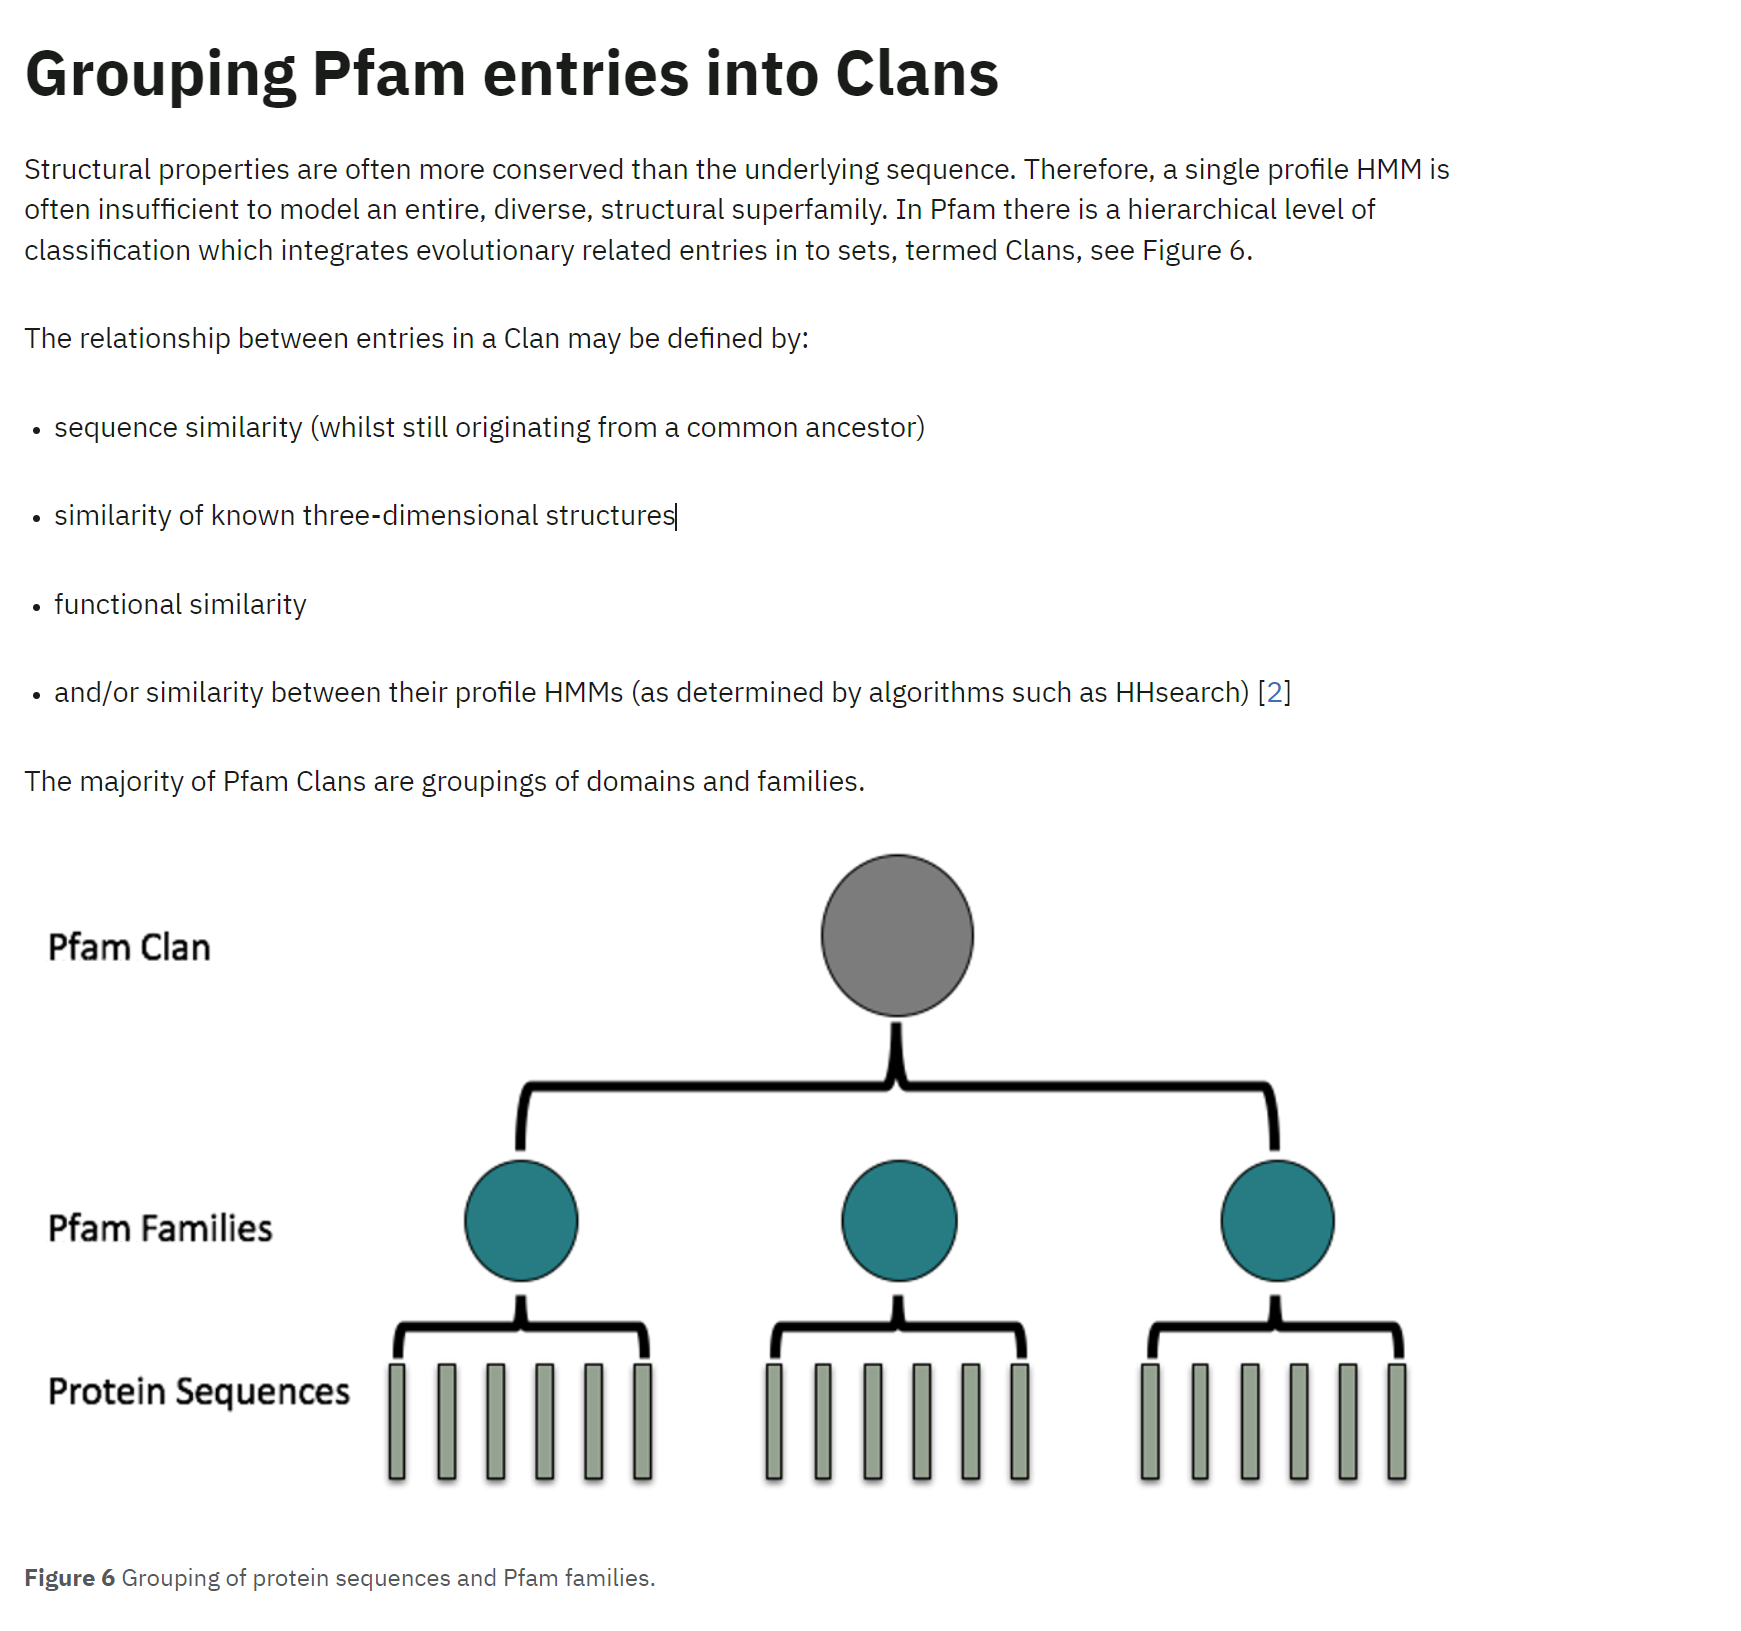

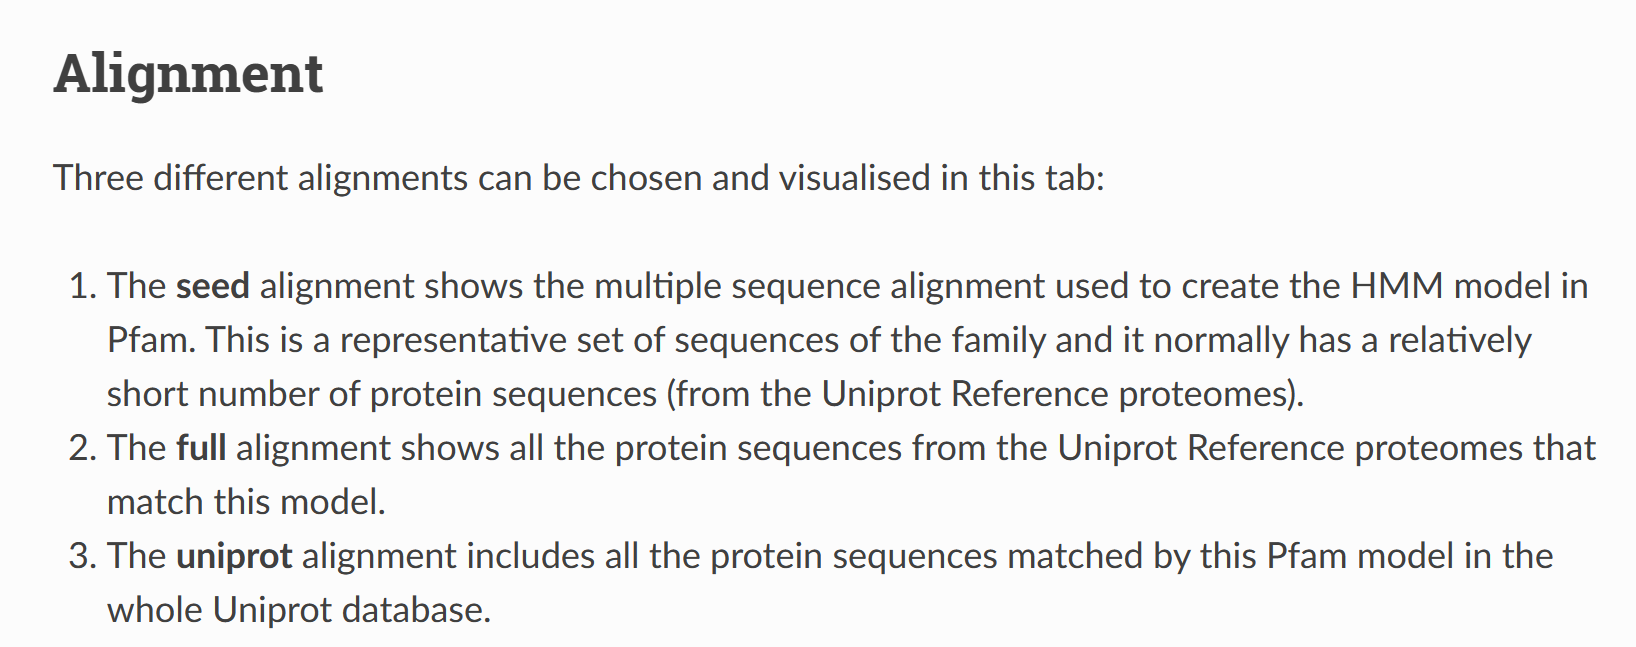

## HH-suite
https://github.com/soedinglab/hh-suite/wiki

### DB operation
DB structure
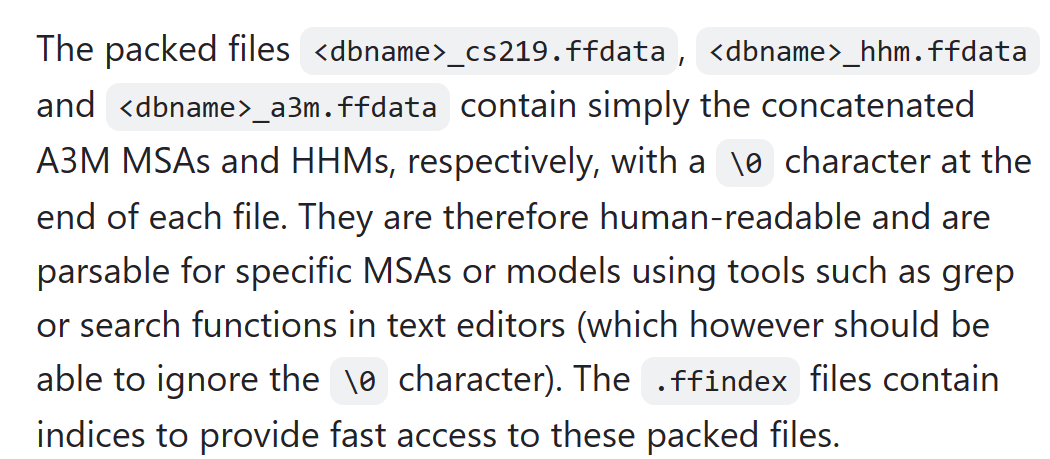

DB unpack
ffindex_get scop70_a3m.ffdata scop70_a3m.ffindex d1aa7a_.a3m
ffindex_unpack scop70_a3m.ffdata scop70_a3m.ffindex tmp/scop70/ .
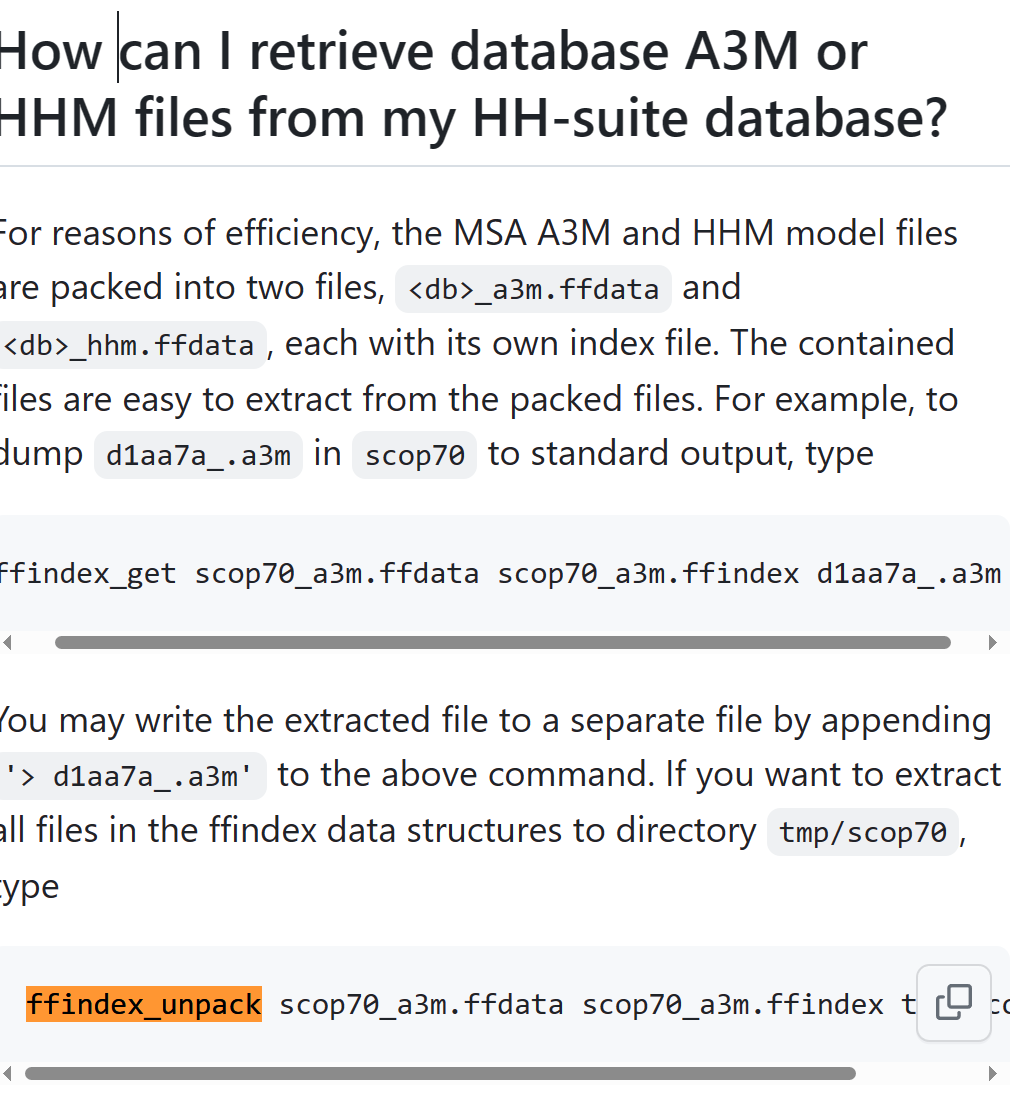

### issue: pfam family not included in hh-suites
hh-suite only have curated database of pfam3.5, but interproscan search uses version 3.6. thus many families are not included.
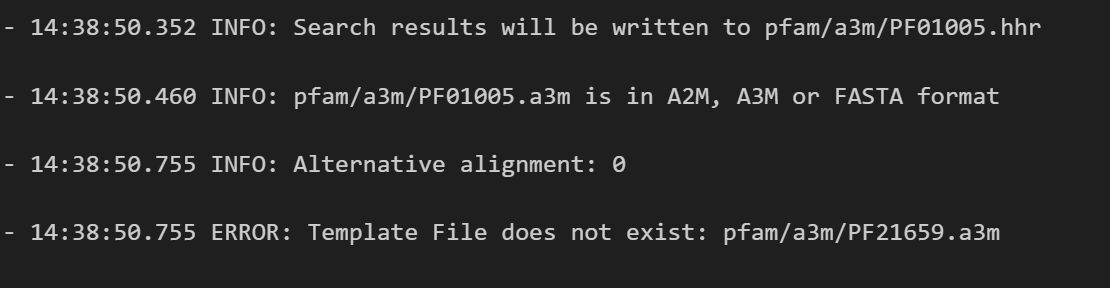

### issue: deprecation of HMM format support in hh-suites
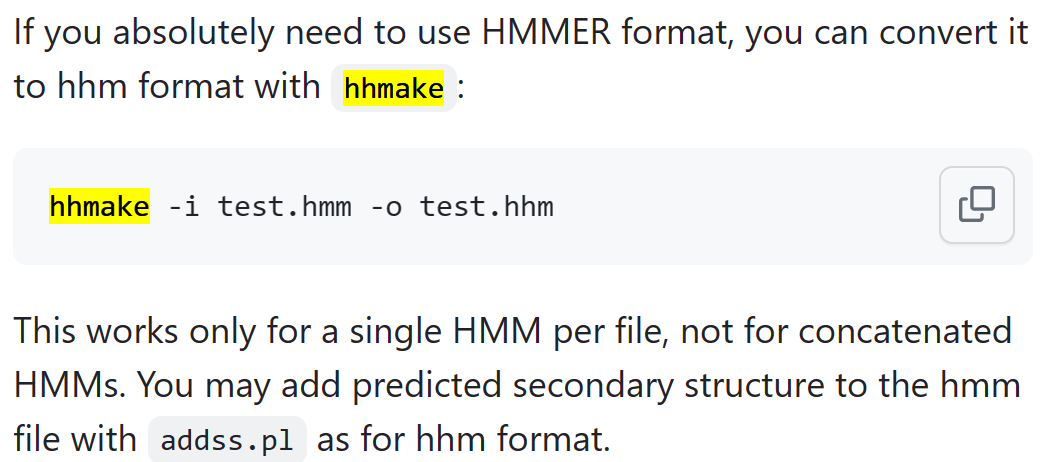

Report Error and generate empty file
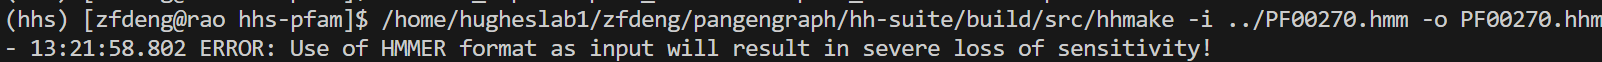
